In [1]:
#import necessary packages 
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from future.utils import iteritems
from util import find_analogies
from sklearn.decomposition import TruncatedSVD, PCA, KernelPCA
import os
import sys
sys.path.append(os.path.abspath('..'))
from nltk_data_cleanup import nltk_cleanup

In [2]:
# Read in  the first document
with open('./lotr_fotr.txt') as f:
    lotr_fotr = f.read()
 
words_fotr=' '
for word in lotr_fotr.split():
    word,flag = nltk_cleanup(word)
    if flag == 'Y':
        words_fotr=words_fotr+word+" " 

In [3]:
# Read in  the second document
with open('./lotr_ttt.txt') as f:
    lotr_ttt = f.read()
 
words_ttt=' '
for word in lotr_ttt.split():
    word,flag = nltk_cleanup(word)
    if flag == 'Y':
        words_ttt=words_ttt+word+" " 

In [4]:
# Read in the third doscument
with open('./lotr_rotk.txt') as f:
    lotr_rotk = f.read()
 
words_rotk=' '
for word in lotr_rotk.split():
    word,flag = nltk_cleanup(word)
    if flag == 'Y':
        words_rotk=words_rotk+word+" " 

In [5]:
# Append all the three documents together
document_list=[words_fotr,words_ttt,words_rotk]


In [6]:
# getting the counts for TF-IDF
cv = CountVectorizer()
word_count_vector = cv.fit_transform(document_list)
word_count_vector.shape

(3, 13743)

In [7]:
# running the TF_IDF transformer
tfidf_transformer=TfidfTransformer()
sne_input=tfidf_transformer.fit_transform(word_count_vector)
sne_input=sne_input.toarray()
np.shape(sne_input)

(3, 13743)

In [8]:
# print idf values
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"])
# sort ascending
df_idf.head()

,idf_weights
aback,1.693147
abandon,1.000000
abandoned,1.287682
abandons,1.693147
abashed,1.000000


In [9]:
# Redusing number of components
tsne = TSNE(n_components=2)
tsne_transform=tsne.fit_transform(sne_input.T)
np.shape(tsne_transform)
#

(13743, 2)

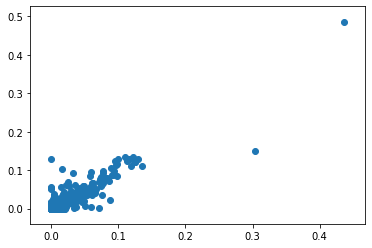

In [10]:
# plotting all the words aling two axes
plt.scatter(sne_input[0,:],sne_input[1,:])

In [11]:
# building the word dictionary
idx2word={}
word2idx={}
for i in range(len(cv.get_feature_names())):
    idx2word[i]=cv.get_feature_names()[i]
    word2idx[cv.get_feature_names()[i]]=i    

In [16]:
# Aging perforiming Tsne but with3 dimensions
tsne = TSNE(n_components=3)
We=tsne.fit_transform(sne_input.T)
print(We.shape)

(13743, 3)


In [17]:
# Finding different Analogies
find_analogies('aragorn','king','sauron',We,word2idx,idx2word)

closest match by euclidean distance: water
aragorn - king = water - sauron
closest match by cosine distance: ring
aragorn - king = ring - sauron


In [18]:
find_analogies('denethor','gondor','frodo',We,word2idx,idx2word)

closest match by euclidean distance: back
denethor - gondor = back - frodo
closest match by cosine distance: one
denethor - gondor = one - frodo


In [19]:
find_analogies('denethor','gondor','sauron',We,word2idx,idx2word)

closest match by euclidean distance: doom
denethor - gondor = doom - sauron
closest match by cosine distance: run
denethor - gondor = run - sauron
